In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies = pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies_df = movies.iloc[:, [5,6,7,8,9,10,11,12,13,14]]
movies_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
frequent_movies = apriori(movies_df, min_support = 0.005, max_len = 3, use_colnames = True)
print(frequent_movies.sort_values("support", ascending = False, inplace = True))
frequent_movies

None


,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
17,0.6,"(Gladiator, Patriot)"
4,0.6,(Patriot)
10,0.5,"(Sixth Sense, Gladiator)"
13,0.4,"(Sixth Sense, Patriot)"
30,0.4,"(Sixth Sense, Gladiator, Patriot)"
3,0.2,(Harry Potter1)
9,0.2,(Green Mile)
5,0.2,(LOTR2)


<ipython-input-5-1bff77b54dc7>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar((range(1,11)), frequent_movies.support[1:11], color='rgbyc')


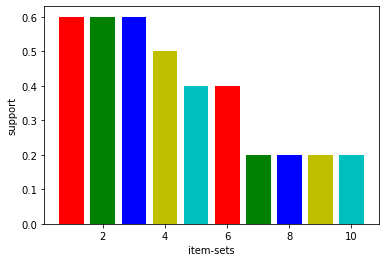

In [5]:
plt.bar((range(1,11)), frequent_movies.support[1:11], color='rgbyc')
plt.xlabel('item-sets');plt.ylabel('support');

In [6]:
rules = association_rules(frequent_movies, metric = "lift", min_threshold= 1)
rules_r = rules.sort_values('lift', ascending = False)
rules_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
84,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
80,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
72,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
71,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
28,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


In [7]:
frequent_movies1 = apriori(movies_df, min_support = 0.01, max_len = 4, use_colnames = True)
rules1 = association_rules(frequent_movies1, metric = "lift", min_threshold= 1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
203,"(Green Mile, Harry Potter1)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
204,(LOTR1),"(LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
205,(LOTR2),"(LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
206,(Green Mile),"(LOTR1, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [8]:
frequent_movies2 = apriori(movies_df, min_support = 0.1, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies2, metric = "lift", min_threshold= 1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
119,"(LOTR2, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
120,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
121,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
122,(Green Mile),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [9]:
frequent_movies3 = apriori(movies_df, min_support = 0.1, max_len = 3, use_colnames = True)
rules3 = association_rules(frequent_movies3, metric = "lift", min_threshold= 1.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
...,...,...,...,...,...,...,...,...,...
95,"(LOTR2, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
96,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
97,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
98,(Green Mile),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
frequent_movies4 = apriori(movies_df, min_support = 0.5, max_len = 3, use_colnames = True)
rules4 = association_rules(frequent_movies4, metric = "lift", min_threshold= 1)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [11]:
frequent_movies5 = apriori(movies_df, min_support = 0.007, max_len = 3, use_colnames = True)
rules5 = association_rules(frequent_movies5, metric = "confidence", min_threshold= 0.8)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


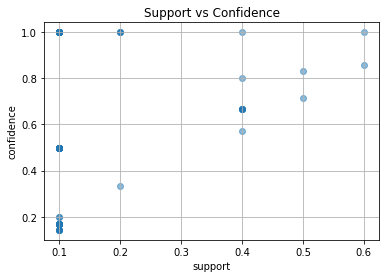

In [12]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.grid()
plt.show()

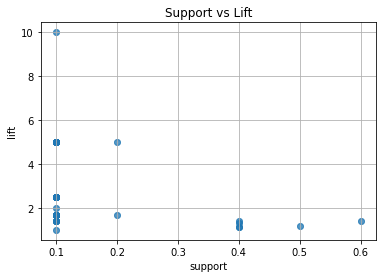

In [13]:
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.grid()
plt.show()

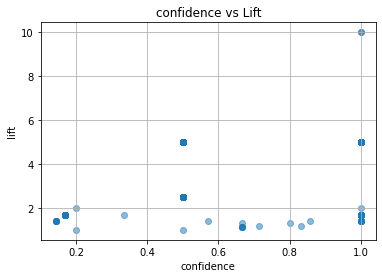

In [14]:
plt.scatter(rules["confidence"], rules["lift"], alpha=0.5)
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("confidence vs Lift")
plt.grid()
plt.show()